In [1]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan~=2.14
  !pip install fbprophet
  !pip install hvplot
  !pip install holoviews
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')

Libraries successfully installed


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from fbprophet import Prophet

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [3]:
# Upload the top 25 sp500 stocks csv file 
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [4]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("BTC-USD.csv",
                 index_col="Date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop(columns=["Open", "High", "Low", "Close", "Volume"] , axis=1)

# Preview the dataset
df.head()

,Adj Close
Date,
2017-12-19,17776.699219
2017-12-20,16624.599609
2017-12-21,15802.900391
2017-12-22,13831.799805
2017-12-23,14699.200195


In [5]:
# Reset the index so that we recode the columns for Prophet
df.reset_index(inplace = True)

In [6]:
# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = df.rename(columns = {'Date' : 'ds', 'Adj Close' : 'y'})

In [7]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1828 non-null   datetime64[ns]
 1   y       1828 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


In [8]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,17776.699219
1,2017-12-20,16624.599609
2,2017-12-21,15802.900391
3,2017-12-22,13831.799805
4,2017-12-23,14699.200195


,ds,y
1823,2022-12-16,16647.484375
1824,2022-12-17,16795.091797
1825,2022-12-18,16757.976563
1826,2022-12-19,16439.679688
1827,2022-12-20,16583.460938


In [9]:
# Sort the DataFrame by `ds` in ascending order
prophet_df = prophet_df.sort_values('ds', ascending = True)

# Display sample data from head and tail
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,17776.699219
1,2017-12-20,16624.599609
2,2017-12-21,15802.900391
3,2017-12-22,13831.799805
4,2017-12-23,14699.200195


,ds,y
1823,2022-12-16,16647.484375
1824,2022-12-17,16795.091797
1825,2022-12-18,16757.976563
1826,2022-12-19,16439.679688
1827,2022-12-20,16583.460938


In [10]:
# Call the Prophet function, store as an object
model_bitcoin = Prophet()

In [11]:
# Fit the Prophet model.
model_bitcoin.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model_bitcoin.make_future_dataframe(periods = 30, freq = 'D')

# View the last five rows of the predictions
display(future_trends.head())
display(future_trends.tail())

,ds
0,2017-12-19
1,2017-12-20
2,2017-12-21
3,2017-12-22
4,2017-12-23


,ds
1853,2023-01-15
1854,2023-01-16
1855,2023-01-17
1856,2023-01-18
1857,2023-01-19


In [13]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model_bitcoin.predict(future_trends)

# Display the first five rows of the forecast DataFrame
display(forecast_trends.head())
display(forecast_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-19,11779.663875,6654.048113,15631.830353,11779.663875,11779.663875,-417.220273,-417.220273,-417.220273,9.920505,9.920505,9.920505,-427.140778,-427.140778,-427.140778,0.0,0.0,0.0,11362.443602
1,2017-12-20,11758.027632,7217.446134,15987.975043,11758.027632,11758.027632,-294.290675,-294.290675,-294.290675,39.240987,39.240987,39.240987,-333.531662,-333.531662,-333.531662,0.0,0.0,0.0,11463.736957
2,2017-12-21,11736.391389,6732.336446,15480.163259,11736.391389,11736.391389,-266.316012,-266.316012,-266.316012,-42.431126,-42.431126,-42.431126,-223.884886,-223.884886,-223.884886,0.0,0.0,0.0,11470.075376
3,2017-12-22,11714.755146,7258.113115,15996.422173,11714.755146,11714.755146,-124.060637,-124.060637,-124.060637,-23.655775,-23.655775,-23.655775,-100.404862,-100.404862,-100.404862,0.0,0.0,0.0,11590.694509
4,2017-12-23,11693.118903,7694.464296,16643.781688,11693.118903,11693.118903,41.659566,41.659566,41.659566,7.328555,7.328555,7.328555,34.331011,34.331011,34.331011,0.0,0.0,0.0,11734.778469


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1853,2023-01-15,9347.647875,4774.315266,13790.570216,9164.070640,9503.645488,-56.094750,-56.094750,-56.094750,-3.549579,-3.549579,-3.549579,-52.545172,-52.545172,-52.545172,0.0,0.0,0.0,9291.553125
1854,2023-01-16,9250.494255,4039.193468,13172.742575,9041.368376,9425.177726,-264.014390,-264.014390,-264.014390,13.146432,13.146432,13.146432,-277.160822,-277.160822,-277.160822,0.0,0.0,0.0,8986.479865
1855,2023-01-17,9153.340635,4365.696363,13061.425259,8927.423795,9354.420193,-492.756550,-492.756550,-492.756550,9.920505,9.920505,9.920505,-502.677055,-502.677055,-502.677055,0.0,0.0,0.0,8660.584085
1856,2023-01-18,9056.187016,4030.845282,12708.055239,8793.160248,9281.717771,-685.411201,-685.411201,-685.411201,39.240987,39.240987,39.240987,-724.652189,-724.652189,-724.652189,0.0,0.0,0.0,8370.775814
1857,2023-01-19,8959.033396,3830.713736,12243.139953,8670.579282,9220.873725,-981.093152,-981.093152,-981.093152,-42.431126,-42.431126,-42.431126,-938.662026,-938.662026,-938.662026,0.0,0.0,0.0,7977.940244


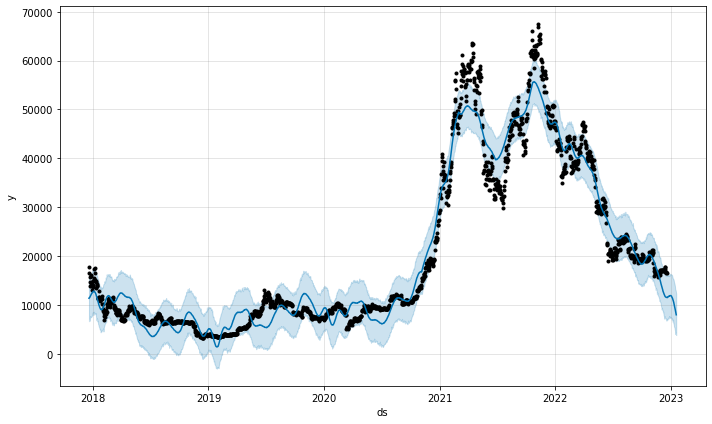

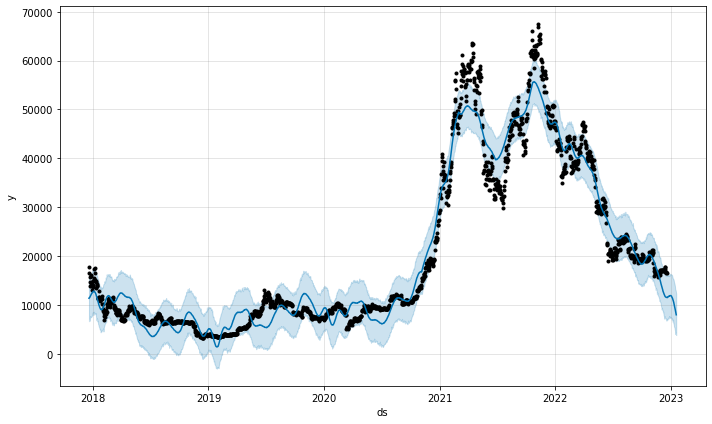

In [14]:
# Plot the Prophet predictions for the Mercado trends data
model_bitcoin.plot(forecast_trends)

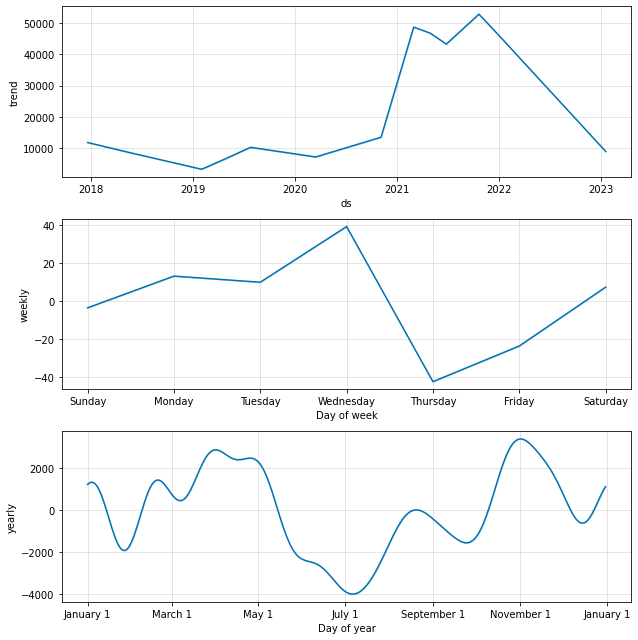

In [15]:
# Use the plot_components function to visualize the forecast results 
figures = model_bitcoin.plot_components(forecast_trends)

In [16]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends.set_index('ds', inplace = True)
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2017-12-19,11779.663875,6654.048113,15631.830353,11779.663875,11779.663875,-417.220273,-417.220273,-417.220273,9.920505,9.920505,9.920505,-427.140778,-427.140778,-427.140778,0.0,0.0,0.0,11362.443602
2017-12-20,11758.027632,7217.446134,15987.975043,11758.027632,11758.027632,-294.290675,-294.290675,-294.290675,39.240987,39.240987,39.240987,-333.531662,-333.531662,-333.531662,0.0,0.0,0.0,11463.736957
2017-12-21,11736.391389,6732.336446,15480.163259,11736.391389,11736.391389,-266.316012,-266.316012,-266.316012,-42.431126,-42.431126,-42.431126,-223.884886,-223.884886,-223.884886,0.0,0.0,0.0,11470.075376
2017-12-22,11714.755146,7258.113115,15996.422173,11714.755146,11714.755146,-124.060637,-124.060637,-124.060637,-23.655775,-23.655775,-23.655775,-100.404862,-100.404862,-100.404862,0.0,0.0,0.0,11590.694509
2017-12-23,11693.118903,7694.464296,16643.781688,11693.118903,11693.118903,41.659566,41.659566,41.659566,7.328555,7.328555,7.328555,34.331011,34.331011,34.331011,0.0,0.0,0.0,11734.778469


In [17]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

forecast_trends_updated = forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_trends_updated.iloc[-240:,:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_trends = forecast_trends.reset_index()
forecast = forecast_trends[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Replace the column names to something less technical sounding
forecast = forecast.rename(columns = 
                                             {'yhat' : 'Most Likely Case',
                                              'yhat_lower' : 'Worst Case',
                                              'yhat_upper' : 'Best Case'}
                                             )

forecast = forecast.loc['2022-12-19':]
forecast.to_csv('BTC-USD_forecast.csv', index = False)
# Review the last five rows of the DataFrame
display(forecast.head())
display(forecast.tail())

,ds,Most Likely Case,Worst Case,Best Case
203,2018-07-10,3544.285504,-1032.541272,7669.365824
204,2018-07-11,3588.168138,-850.919939,7786.206029
205,2018-07-12,3529.723239,-1053.297872,7843.592369
206,2018-07-13,3580.198557,-710.966416,8143.678052
207,2018-07-14,3651.136208,-969.670682,8154.190013


,ds,Most Likely Case,Worst Case,Best Case
1853,2023-01-15,9291.553125,4774.315266,13790.570216
1854,2023-01-16,8986.479865,4039.193468,13172.742575
1855,2023-01-17,8660.584085,4365.696363,13061.425259
1856,2023-01-18,8370.775814,4030.845282,12708.055239
1857,2023-01-19,7977.940244,3830.713736,12243.139953


In [19]:
# Display the average forecasted price for November 2022
forecast.mean()

Most Likely Case    13888.217168
Worst Case           9429.697992
Best Case           18337.666727
dtype: float64